In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
print("Training Data is: \n",df_train.head())

df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
print("\nTest Data is: \n", df_test.head())

Training Data is: 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

**Missing Values Assesments**

In [114]:
print("Missing Values: ")

df_train.isnull().sum()

Missing Values: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Let's see age distribution


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

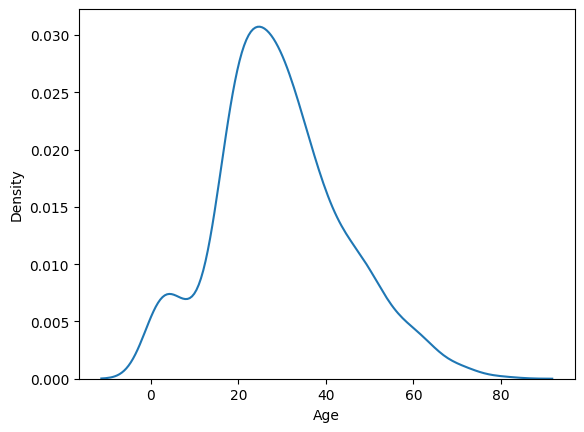

In [115]:
print("Let's see age distribution")
      
sns.kdeplot(df_train['Age'])

Let's see cabin distribution


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cabin_encoded', ylabel='Density'>

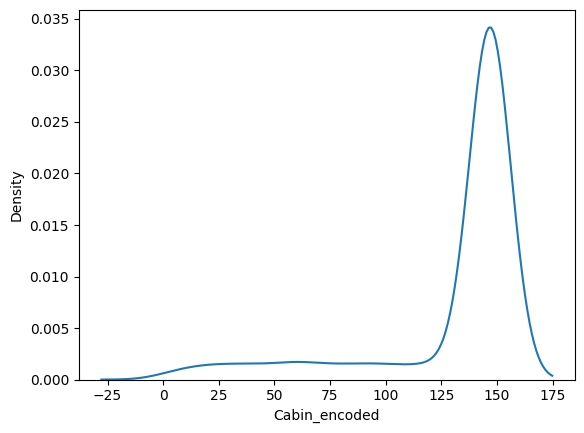

In [116]:
print("Let's see cabin distribution")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Category' column
df_train['Cabin_encoded'] = label_encoder.fit_transform(df_train['Cabin'])

#print(df_train['Cabin_encoded'])
sns.kdeplot(df_train['Cabin_encoded'])

Let's see embarked distribution


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Embarked_encoded', ylabel='Density'>

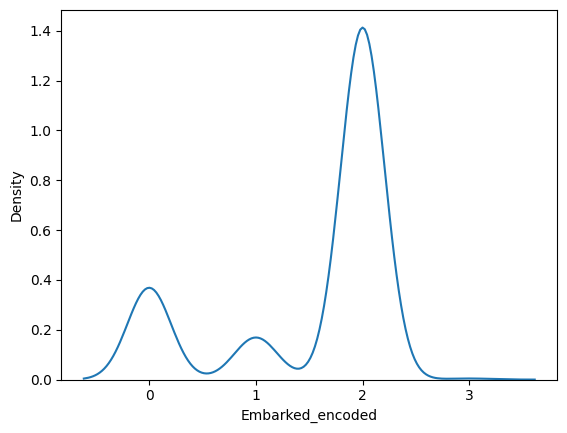

In [117]:
print("Let's see embarked distribution")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'Category' column
df_train["Embarked_encoded"] = label_encoder.fit_transform(df_train["Embarked"])

sns.kdeplot(df_train["Embarked_encoded"])

In [118]:
print("Let's adjust age")

non_null_age = len(df_train['Age']) - df_train['Age'].isnull().sum()

mean_age = (df_train['Age'].sum())/non_null_age
median_age = df_train['Age'].median(skipna = True)

print("Mean value of age is", mean_age)
print("Median value of age is", median_age)

Let's adjust age
Mean value of age is 29.69911764705882
Median value of age is 28.0


**Final Adjustments**

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

If "Age" is missing for a given row, I'll impute with 28 (median age).
If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.

In [119]:
train_data = df_train.copy()

In [120]:
train_data["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)

/tmp/ipykernel_32/828803913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)


In [127]:
print("Let's adjust embarked")

train_data["Embarked"].fillna(df_train['Embarked'].value_counts().idxmax(), inplace = True)

train_data.head()

Let's adjust embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,147,2


In [126]:
print("Let's adjust cabin")

train_data.drop('Cabin', axis = 1, inplace = True)

train_data.head()

Let's adjust cabin


KeyError: "['Cabin'] not found in axis"

In [125]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            0
Cabin_encoded       0
Embarked_encoded    0
dtype: int64

In [128]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_encoded,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,81,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,55,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,147,2


**Exploration based on age**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



<Axes: >

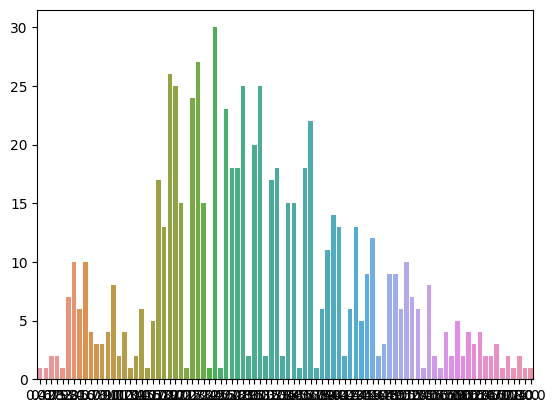

In [206]:
unq_age = set(df_train['Age'])
surv_unq_age = []
upd_unq_age = []

for i in unq_age: 
    sum_surv = 0
    upd_unq_age.append(i)
    for j in df_train['Age']:
        if(i == j):
            sum_surv += 1
        else:
            sum_surv += 0
    surv_unq_age.append(sum_surv)
    
sns.barplot(x = upd_unq_age, y = surv_unq_age, data = df_train)